1. Can we use Bagging for regression problems? 

Answer: Yes, Bagging can absolutely be used for regression problems. Bagging (Bootstrap Aggregating) technique is effective for predicting continuous numerical values.

2. What is the difference between multiple model training and single model training?  
Ans: Single model training uses one algorithm on the full dataset, whereas multiple model training (ensemble learning) combines several models to improve overall predictive performance and stability.


3. Explain the concept of feature randomness in Random Forest.  
Ans: In Random Forest, each split in a decision tree is determined by searching for the best feature among a random subset of features rather than all available features, which helps decorrelate the trees.


4. What is OOB (Out-of-Bag) Score?  
Ans: The OOB score is a performance metric calculated using samples that were not included in the bootstrap training set for a particular tree, acting as a built-in cross-validation.


5. How can you measure the importance of features in a Random Forest model?  
Ans: Feature importance is measured by calculating the average decrease in impurity (like Gini or Entropy) or the drop in model accuracy when a specific feature's values are permuted across all trees.



6. Explain the working principle of a Bagging Classifier.  
Ans: Bagging Classifier creates multiple subsets of data using bootstrap sampling, trains a classifier on each subset in parallel, and aggregates their results via majority voting.



7. How do you evaluate a Bagging Classifier's performance?  
Ans: Bagging Classifier's performance is typically evaluated using standard metrics like accuracy, precision, recall, F1-score, or the OOB score.



8. How does a Bagging Regressor work?  
Ans: Like the classifier, Bagging Regressor trains multiple regressors on bootstrap samples and then averages their individual numerical predictions to produce the final output.



9. What is the main advantage of ensemble techniques?  
Ans: The main advantage of ensemble techniques is the reduction of variance and bias, which leads to higher accuracy and better generalization on unseen data compared to single models.



10. What is the main challenge of ensemble methods?  
Ans: The primary challenges are increased computational cost (time and memory) and reduced model interpretability compared to a single decision tree.



11. Explain the key idea behind ensemble techniques.  
Ans: The key idea is to combine multiple "weak learners" to create a "strong learner" that is more robust and accurate than any individual component.



12. What is a Random Forest Classifier?  
Ans: It is an ensemble of many decision trees, where each tree is built on a bootstrap sample and uses feature randomness to ensure the trees are diverse.



13. What are the main types of ensemble techniques?  
Ans: The three main types are Bagging (Bootstrap Aggregating), Boosting, and Stacking.



14. What is ensemble learning in machine learning?  
Ans: It is a strategic approach where multiple models are trained to solve the same problem and combined to achieve better results than a single model could alone.



15. When should we avoid using ensemble methods?  
Ans: Avoid ensemble methods when the dataset is very small (leading to overfitting), when interpretability is the highest priority, or when computational resources are extremely limited.



16. How does Bagging help in reducing overfitting?  
Ans: Bagging reduces overfitting by averaging the results of multiple models trained on different data subsets, which smooths out the noise and lowers the overall variance.



17. Why is Random Forest better than a single Decision Tree?  
Ans: A single tree is prone to high variance and overfitting; Random Forest overcomes this by aggregating many trees, which balances out individual errors.



18. What is the role of bootstrap sampling in Bagging?  
Ans: Bootstrap sampling (sampling with replacement) provides each model with a unique subset of data, ensuring the diversity needed for effective aggregation.


19. What are some real-world applications of ensemble techniques?  
Ans: Common applications include fraud detection, stock market prediction, medical diagnosis, and recommendation systems.



20. What is the difference between Bagging and Boosting?  
Ans: Bagging builds independent models in parallel to reduce variance, while Boosting builds models sequentially, with each new model attempting to correct the errors of the previous ones.


21. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy.

In [1]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_tree = DecisionTreeClassifier()

bagging_clf = BaggingClassifier(estimator=base_tree, n_estimators=50, random_state=42)
bagging_clf.fit(X_train, y_train)

y_pred = bagging_clf.predict(X_test)
print(f"Bagging Classifier Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Bagging Classifier Accuracy: 0.8850


22. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE).

In [2]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_node = DecisionTreeRegressor()

bagging_reg = BaggingRegressor(estimator=base_node, n_estimators=50, random_state=42)
bagging_reg.fit(X_train, y_train)

y_pred = bagging_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Bagging Regressor Mean Squared Error: {mse:.4f}")

Bagging Regressor Mean Squared Error: 2605.9644


23. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores.

In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

importances = rf_clf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': data.feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Top 10 Feature Importance Scores:")
print(feature_importance_df.head(10))

Top 10 Feature Importance Scores:
                 Feature  Importance
23            worst area    0.153892
27  worst concave points    0.144663
7    mean concave points    0.106210
20          worst radius    0.077987
6         mean concavity    0.068001
22       worst perimeter    0.067115
2         mean perimeter    0.053270
0            mean radius    0.048703
3              mean area    0.047555
26       worst concavity    0.031802


24. Train a Random Forest Regressor and compare its performance with a single Decision Tree.

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X, y = make_regression(n_samples=1000, n_features=10, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

print("--- Decision Tree Performance ---")
print(f"MSE: {mean_squared_error(y_test, y_pred_dt):.4f}")
print(f"R2 Score: {r2_score(y_test, y_pred_dt):.4f}")

print("\n--- Random Forest Performance ---")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf):.4f}")
print(f"R2 Score: {r2_score(y_test, y_pred_rf):.4f}")

--- Decision Tree Performance ---
MSE: 6381.5780
R2 Score: 0.6217

--- Random Forest Performance ---
MSE: 2584.7861
R2 Score: 0.8468


25. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier.

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=200, oob_score=True, random_state=42)

rf_clf.fit(X_train, y_train)

print(f"Out-of-Bag (OOB) Score: {rf_clf.oob_score_:.4f}")

Out-of-Bag (OOB) Score: 0.9000


26. Train a Bagging Classifier using SVM as a base estimator and print accuracy.

In [6]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=500, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_svm = SVC(kernel='linear', random_state=42)

bagging_svm = BaggingClassifier(estimator=base_svm, n_estimators=10, random_state=42)
bagging_svm.fit(X_train, y_train)

y_pred = bagging_svm.predict(X_test)
print(f"Bagging Classifier (SVM) Accuracy: {accuracy_score(y_test, y_pred):.4f}")

Bagging Classifier (SVM) Accuracy: 0.8800


27. Train a Random Forest Classifier with different numbers of trees and compare accuracy.

In [7]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_counts = [1, 5, 10, 50, 100, 200, 500]
accuracies = []

for n in tree_counts:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Trees: {n:3} | Accuracy: {acc:.4f}")

Trees:   1 | Accuracy: 0.7300
Trees:   5 | Accuracy: 0.8200
Trees:  10 | Accuracy: 0.8750
Trees:  50 | Accuracy: 0.8700
Trees: 100 | Accuracy: 0.8700
Trees: 200 | Accuracy: 0.8900
Trees: 500 | Accuracy: 0.8950


28. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score.

In [8]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_lr = LogisticRegression(max_iter=1000)

bagging_lr = BaggingClassifier(estimator=base_lr, n_estimators=50, random_state=42)
bagging_lr.fit(X_train, y_train)

y_probs = bagging_lr.predict_proba(X_test)[:, 1]

auc_score = roc_auc_score(y_test, y_probs)
print(f"Bagging Classifier (Logistic Regression) AUC Score: {auc_score:.4f}")

Bagging Classifier (Logistic Regression) AUC Score: 0.9219


29. Train a Random Forest Regressor and analyze feature importance scores.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

importances = rf_reg.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': housing.feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importance Scores:")
print(feature_importance_df)

Feature Importance Scores:
      Feature  Importance
0      MedInc    0.524871
5    AveOccup    0.138443
6    Latitude    0.088936
7   Longitude    0.088629
1    HouseAge    0.054593
2    AveRooms    0.044272
4  Population    0.030650
3   AveBedrms    0.029606


30. Train an ensemble model using both Bagging and Random Forest and compare accuracy.

In [10]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

print(f"Bagging Classifier Accuracy: {accuracy_score(y_test, y_pred_bagging):.4f}")
print(f"Random Forest Accuracy:    {accuracy_score(y_test, y_pred_rf):.4f}")

Bagging Classifier Accuracy: 0.8600
Random Forest Accuracy:    0.8700


31. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV.

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")
print(f"Test Set Accuracy: {grid_search.score(X_test, y_test):.4f}")

Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Best Cross-Validation Accuracy: 0.8938
Test Set Accuracy: 0.9000


32. Train a Bagging Regressor with different numbers of base estimators and compare performance.

In [12]:
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

estimator_counts = [1, 5, 10, 20, 50, 100]
mse_results = []

for n in estimator_counts:
    bagging_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), 
                                   n_estimators=n, 
                                   random_state=42)
    bagging_reg.fit(X_train, y_train)
    y_pred = bagging_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_results.append(mse)
    print(f"Estimators: {n:3} | MSE: {mse:.4f}")

Estimators:   1 | MSE: 9074.5430
Estimators:   5 | MSE: 4162.1330
Estimators:  10 | MSE: 3182.8902
Estimators:  20 | MSE: 2881.8588
Estimators:  50 | MSE: 2605.9644
Estimators: 100 | MSE: 2623.6837


33. Train a Random Forest Classifier and analyze misclassified samples.

In [14]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

misclassified_indices = np.where(y_pred != y_test)[0]
misclassified_samples = X_test.iloc[misclassified_indices].copy()
misclassified_samples['Actual'] = [data.target_names[i] for i in y_test[misclassified_indices]]
misclassified_samples['Predicted'] = [data.target_names[i] for i in y_pred[misclassified_indices]]

print(f"Total Test Samples: {len(y_test)}")
print(f"Number of Misclassified Samples: {len(misclassified_indices)}")

Total Test Samples: 45
Number of Misclassified Samples: 0


34. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier.

In [15]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

single_tree = DecisionTreeClassifier(random_state=42)
single_tree.fit(X_train, y_train)
y_pred_tree = single_tree.predict(X_test)

bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)

print(f"Single Decision Tree Accuracy: {accuracy_score(y_test, y_pred_tree):.4f}")
print(f"Bagging Classifier Accuracy:   {accuracy_score(y_test, y_pred_bagging):.4f}")

Single Decision Tree Accuracy: 0.7950
Bagging Classifier Accuracy:   0.8600


35. Train a Random Forest Classifier and visualize the confusion matrix.

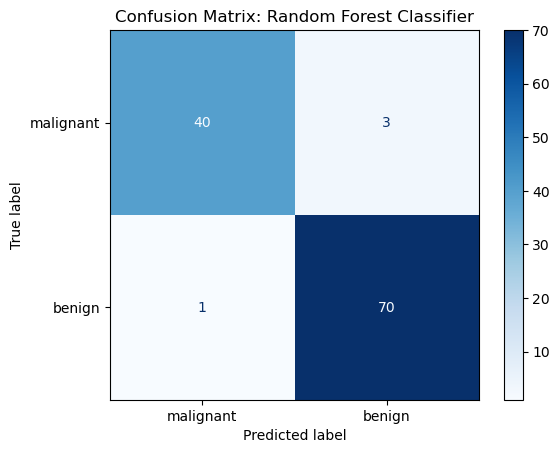

In [16]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: Random Forest Classifier")
plt.show()

36. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy.

In [18]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_models = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42)),
    ('lr', LogisticRegression())
]

stack_clf = StackingClassifier(
    estimators=base_models, 
    final_estimator=LogisticRegression(),
    cv=5
)

stack_clf.fit(X_train, y_train)

print("--- Accuracy Comparison ---")

for name, model in base_models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name.upper()} Standalone Accuracy:      {accuracy_score(y_test, y_pred):.4f}")

y_pred_stack = stack_clf.predict(X_test)
print(f"Stacking Classifier Accuracy:  {accuracy_score(y_test, y_pred_stack):.4f}")

--- Accuracy Comparison ---
DT Standalone Accuracy:      0.7950
SVM Standalone Accuracy:      0.9150
LR Standalone Accuracy:      0.8100
Stacking Classifier Accuracy:  0.9400


37. Train a Random Forest Classifier and print the top 5 most important features.

In [19]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

importances = rf_clf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': data.feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Top 5 Most Important Features:")
print(feature_importance_df.head(5))

Top 5 Most Important Features:
                 Feature  Importance
23            worst area    0.153892
27  worst concave points    0.144663
7    mean concave points    0.106210
20          worst radius    0.077987
6         mean concavity    0.068001


38. Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score.

In [20]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_clf.fit(X_train, y_train)

y_pred = bagging_clf.predict(X_test)

print("--- Bagging Classifier Performance Metrics ---")
print(classification_report(y_test, y_pred))

--- Bagging Classifier Performance Metrics ---
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       112
           1       0.82      0.86      0.84        88

    accuracy                           0.85       200
   macro avg       0.85      0.86      0.85       200
weighted avg       0.86      0.85      0.86       200



39. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy.

In [21]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

depths = [1, 2, 3, 5, 10, 15, 20, None]
train_accuracies = []
test_accuracies = []

for d in depths:
    rf = RandomForestClassifier(n_estimators=100, max_depth=d, random_state=42)
    rf.fit(X_train, y_train)
    
    train_accuracies.append(accuracy_score(y_train, rf.predict(X_train)))
    test_accuracies.append(accuracy_score(y_test, rf.predict(X_test)))
    
    depth_label = d if d is not None else "None (Max)"
    print(f"Max Depth: {str(depth_label):10} | Test Accuracy: {test_accuracies[-1]:.4f}")

Max Depth: 1          | Test Accuracy: 0.7500
Max Depth: 2          | Test Accuracy: 0.7900
Max Depth: 3          | Test Accuracy: 0.8400
Max Depth: 5          | Test Accuracy: 0.8650
Max Depth: 10         | Test Accuracy: 0.8800
Max Depth: 15         | Test Accuracy: 0.8750
Max Depth: 20         | Test Accuracy: 0.8700
Max Depth: None (Max) | Test Accuracy: 0.8700


40. Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance.

In [22]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

bagging_dt = BaggingRegressor(estimator=DecisionTreeRegressor(), 
                              n_estimators=50, random_state=42)
bagging_dt.fit(X_train, y_train)
mse_dt = mean_squared_error(y_test, bagging_dt.predict(X_test))

bagging_knn = BaggingRegressor(estimator=KNeighborsRegressor(), 
                               n_estimators=50, random_state=42)
bagging_knn.fit(X_train, y_train)
mse_knn = mean_squared_error(y_test, bagging_knn.predict(X_test))

print(f"Bagging with Decision Tree MSE: {mse_dt:.4f}")
print(f"Bagging with K-Neighbors  MSE: {mse_knn:.4f}")

Bagging with Decision Tree MSE: 2605.9644
Bagging with K-Neighbors  MSE: 3525.2957


41. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score.

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

y_probs = rf_clf.predict_proba(X_test)[:, 1]

auc_score = roc_auc_score(y_test, y_probs)
print(f"Random Forest ROC-AUC Score: {auc_score:.4f}")

Random Forest ROC-AUC Score: 0.9556


42. Train a Bagging Classifier and evaluate its performance using cross-validation

In [25]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, random_state=42)

bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
cv_scores = cross_val_score(bagging_clf, X, y, cv=5)

print(f"Cross-Validation Scores: {cv_scores}")

Cross-Validation Scores: [0.855 0.88  0.9   0.885 0.91 ]


43. Train a Random Forest Classifier and plot the Precision-Recall curve

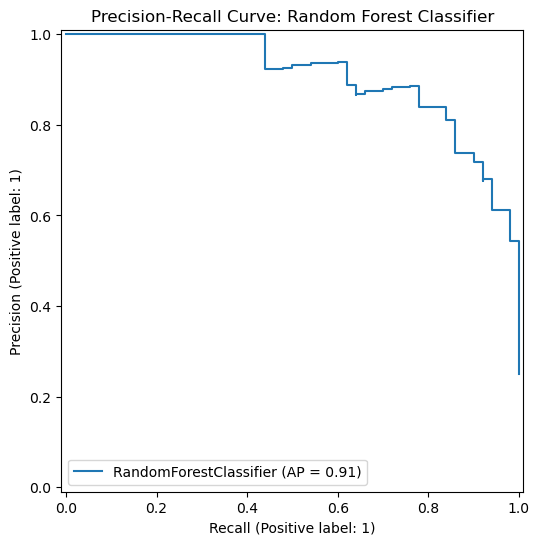

In [26]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import PrecisionRecallDisplay

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, 
                           weights=[0.7, 0.3], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(8, 6))
PrecisionRecallDisplay.from_estimator(rf_clf, X_test, y_test, ax=ax)
ax.set_title("Precision-Recall Curve: Random Forest Classifier")
plt.show()

44. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy.

In [27]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression())
]

stack_clf = StackingClassifier(
    estimators=base_models, 
    final_estimator=LogisticRegression(),
    cv=5
)

stack_clf.fit(X_train, y_train)

print("--- Accuracy Comparison ---")

for name, model in base_models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name.upper()} Standalone Accuracy:      {accuracy_score(y_test, y_pred):.4f}")

y_pred_stack = stack_clf.predict(X_test)
print(f"Stacking Classifier Accuracy:  {accuracy_score(y_test, y_pred_stack):.4f}")

--- Accuracy Comparison ---
RF Standalone Accuracy:      0.8700
LR Standalone Accuracy:      0.8100
Stacking Classifier Accuracy:  0.8850


45. Train a Bagging Regressor with different levels of bootstrap samples and compare performance.

In [29]:
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sample_ratios = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
mse_results = []

for ratio in sample_ratios:
    bagging_reg = BaggingRegressor(
        estimator=DecisionTreeRegressor(), 
        n_estimators=50, 
        max_samples=ratio, 
        random_state=42
    )
    bagging_reg.fit(X_train, y_train)
    y_pred = bagging_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_results.append(mse)
    print(f"Sample Ratio: {ratio:3.1f} | MSE: {mse:.4f}")

Sample Ratio: 0.1 | MSE: 4023.3569
Sample Ratio: 0.3 | MSE: 3039.3833
Sample Ratio: 0.5 | MSE: 2606.1741
Sample Ratio: 0.7 | MSE: 2672.5621
Sample Ratio: 0.9 | MSE: 2739.3493
Sample Ratio: 1.0 | MSE: 2605.9644
